## 04.P Geospatial Data Problem Set – Summarizing Airborne Snow Observatory Data

__Background:__ For your graduate research, you are using lidar-derived snow water equivalent (SWE) estimates to assimilate into a physics based hydrology model to make streamflow predictions. In thinking through your hypotheses portions of the landscape where SWE data will have the most impact, you are reminded of a figure you saw in a presentation at a recent meeting. The figure shows how the distribution of SWE and land area across a range of elevation interact to control the distribution of water storage in the landscape. The figure looked like the following:

<img src='../img/aso_swe.png' alt='Upper Colorado ASO Analysis' width='750' style='display: block; margin: 0 auto'/>

You already have grids of estimated SWE from the Airborne Snow Observatory (ASO) for 4 separate dates at a 50 m spatial resolution, and a coregistered digital elevation model of the study area – the East River in the Colorado Rocky Mountains.  

__Task:__ Use the skills you've developed and the example notebooks you've examined in this module to create an image like the above. The ASO and coregistered DEM can be found in [this Google Drive folder](https://drive.google.com/drive/u/0/folders/1SkjOWPPJe5N25arCW6qbf2ZJWQsrUAAp). Use any of the four ASO files, which corresponds to 2 different dates in 2018 or 2019, or write your code generically to plot any or all dates. You should only need `rasterio`, `numpy`, and `matplotlib` to create this figure.    

In [1]:
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
# need to bring this function in
# from utils import get_file_paths


In [2]:
root_path = './data'
dir_name = 'aso_data'
elev_tif = 'coge_dem_50m.tif'
swe_tif = 'ASO_50M_SWE_USCOGE_20180331.tif'
elev_path = os.path.join(root_path, dir_name,elev_tif)
swe_path = os.path.join(root_path, dir_name,swe_tif)

In [12]:
elev_data = rio.open(elev_path)
elev_array = elev_data.read(1)

z_min = np.nanmin(elev_array)
z_max = np.nanmax(elev_array)
z_range = z_max - z_min

In [4]:
def z_in_range(z_array, zmin, zmax):
    z_mask = np.ma.masked_outside(z_array, zmin, zmax)

    return z_mask

In [5]:
def values_in_zrange(values_array, values_bins, z_array, zmin, zmax):
    # the masked array with the elevation range input
    z_mask = z_in_range(z_array, zmin, zmax)
    # the values within the elevation range mask provided from z_mask
    values_mask = np.ma.masked_array(values_array, ~z_mask.mask)

    values_1d = values_mask.data[values_mask.mask] # 1D vector of values not masked

    values_counts = np.zeros(values_bins.size)

    for i in np.arange(values_bins.size):
        values_counts[i] = np.count_nonzero(values_1d == values_bins[i])

    return values_counts

In [6]:
swe_data = rio.open(swe_path)
swe_array = np.flipud(swe_data.read(1))
swe_array = swe_array.astype('float')
swe_array[swe_array==0] = np.nan # set the zero values to nan
swe_bins = np.unique(swe_array[~np.isnan(swe_array)])

In [13]:
z_bot = np.floor(z_min/z_range)*z_range
z_top = np.ceil(z_max/z_range)*z_range

In [8]:
z_intervals = np.arange(z_bot, z_top+z_range, z_range)

In [ ]:
# this takes ~6 min to run
swe_counts = values_in_zrange(swe_array,swe_bins, elev_array, zmin=z_min, zmax=z_max)

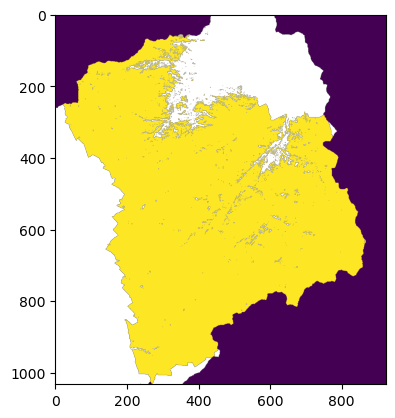

In [11]:
plt.imshow(swe_array)

In [17]:
swe_freq = swe_counts / swe_counts.sum()
z_mean = elev_array.mean()

In [ ]:
# refer to NB 04.3 for the code to compute land-cover fractions per z bands
# ultimately need to calculate areas, and volumes not proportions

In [ ]:
# this ran for 7 min before i terminated
fig, ax = plt.subplots(figsize=(10,8))
left = 0.0

for i in np.arange(swe_bins.size):
    ax.barh(z_mean, swe_freq[i], left=left, height=500.0,label='test')
    left += swe_freq[i]

plt.show()
